<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Charulata_Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Downloading and preparing the data

In [2]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

In [3]:
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


Visualizing the data


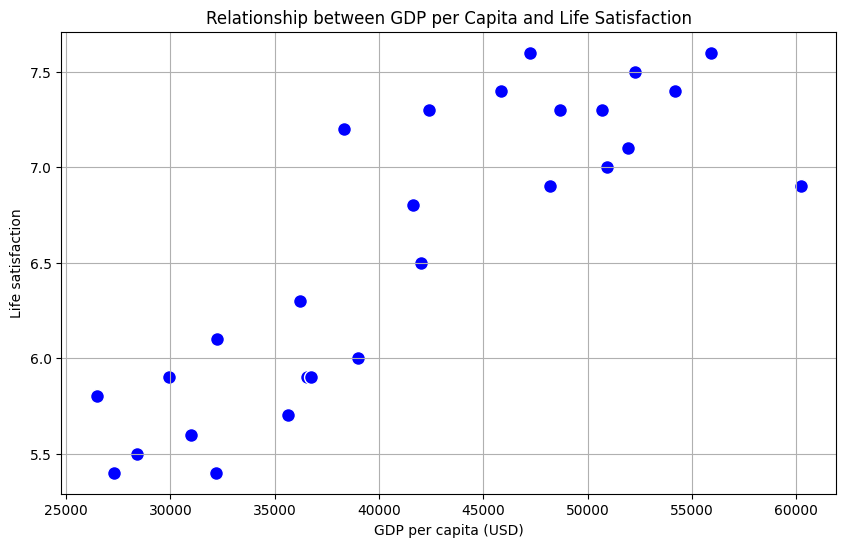

In [5]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(lifesat["GDP per capita (USD)"], lifesat["Life satisfaction"], color='blue', edgecolors='w', s=100)
plt.title("Relationship between GDP per Capita and Life Satisfaction")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.grid(True)

Training and running a Linear Reression model


In [8]:
from sklearn.linear_model import LinearRegression
# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new))

[[6.30165767]]


Replacing the Linear Regression model with k-Nearest Neighbors (here k = 3)


In [9]:
# Select a 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
print(model.predict(X_new))

[[6.33333333]]


**Load and prepare Life satisfaction data**

In [11]:
import urllib.request
from pathlib import Path
datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)
data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [12]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [15]:
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.70,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.00,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
2365,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
2366,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2367,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN


In [16]:
gdp_per_capita

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297
...,...
Vanuatu,2762.791388
Vietnam,8200.331867
World,16194.040310


Data Preprocessing:

In [14]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [17]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [18]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()


,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [19]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [20]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

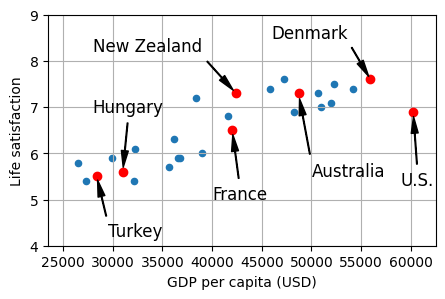

In [23]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.show()


In [24]:
# Filter and sort the DataFrame
highlighted_countries = country_stats.loc[country_stats.index.intersection(position_text.keys())]
sorted_highlighted_countries = highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)


sorted_highlighted_countries.head()


,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3


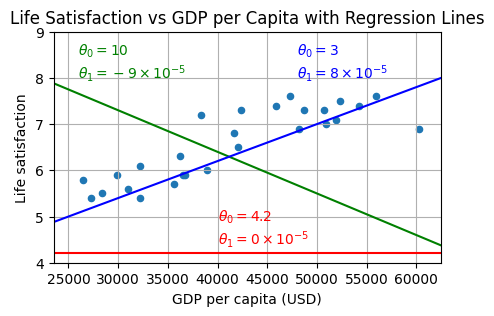

In [25]:

PLOT_WIDTH = 5
PLOT_HEIGHT = 3
MIN_LIFE_SAT = 4
MAX_LIFE_SAT = 9
MIN_GDP = 23_500
MAX_GDP = 62_500
X = np.linspace(MIN_GDP, MAX_GDP, 1000)

def plot_line(ax, w1, w2, color, x_pos, y_pos1, y_pos2):
    ax.plot(X, w1 + w2 * 1e-5 * X, color)
    ax.text(x_pos, y_pos1, fr"$\theta_0 = {w1}$", color=color)
    ax.text(x_pos, y_pos2, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color=color)


fig, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, grid=True, ax=ax)

plot_line(ax, 4.2, 0, "r", 40_000, 4.9, 4.4)
plot_line(ax, 10, -9, "g", 26_000, 8.5, 8.0)
plot_line(ax, 3, 8, "b", 48_000, 8.5, 8.0)


ax.set_xlim([MIN_GDP, MAX_GDP])
ax.set_ylim([MIN_LIFE_SAT, MAX_LIFE_SAT])
ax.set_xlabel("GDP per capita (USD)")
ax.set_ylabel("Life satisfaction")
plt.title("Life Satisfaction vs GDP per Capita with Regression Lines")


plt.show()


θ0=3.75, θ1=6.78e-05


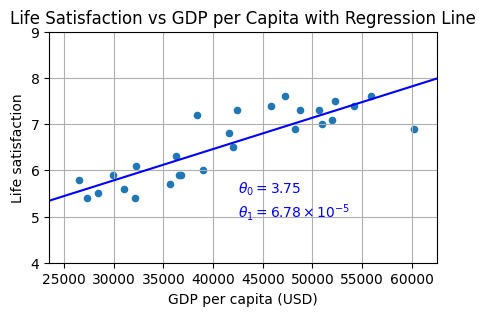

In [26]:
PLOT_WIDTH = 5
PLOT_HEIGHT = 3
MIN_LIFE_SAT = 4
MAX_LIFE_SAT = 9
MIN_GDP = 23_500
MAX_GDP = 62_500


X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

linear_model = LinearRegression()
linear_model.fit(X_sample, y_sample)
theta_0 = linear_model.intercept_[0]
theta_1 = linear_model.coef_[0][0]


print(f"θ0={theta_0:.2f}, θ1={theta_1:.2e}")


def plot_regression_line(ax, theta_0, theta_1, color, label_pos_x, label_pos_y):
    X_range = np.linspace(MIN_GDP, MAX_GDP, 1000)
    y_range = theta_0 + theta_1 * X_range
    ax.plot(X_range, y_range, color, label="Regression Line")
    ax.text(label_pos_x, label_pos_y, fr"$\theta_0 = {theta_0:.2f}$", color=color)
    ax.text(label_pos_x, label_pos_y - 0.5, fr"$\theta_1 = {theta_1 * 1e5:.2f} \times 10^{{-5}}$", color=color)


fig, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, grid=True, ax=ax)


plot_regression_line(ax, theta_0, theta_1, "b", MAX_GDP - 20_000, MIN_LIFE_SAT + 1.5)


ax.set_xlim([MIN_GDP, MAX_GDP])
ax.set_ylim([MIN_LIFE_SAT, MAX_LIFE_SAT])
ax.set_xlabel("GDP per capita (USD)")
ax.set_ylabel("Life satisfaction")
plt.title("Life Satisfaction vs GDP per Capita with Regression Line")


plt.show()


In [27]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

37655.1803457421

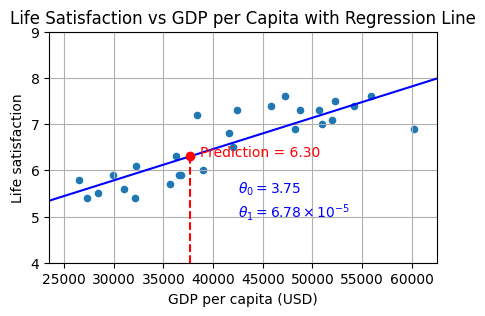

In [30]:
PLOT_WIDTH = 5
PLOT_HEIGHT = 3
MIN_LIFE_SAT = 4
MAX_LIFE_SAT = 9
MIN_GDP = 23_500
MAX_GDP = 62_500

def plot_regression_line(ax, theta_0, theta_1, color, label_pos_x, label_pos_y):
    X_range = np.linspace(MIN_GDP, MAX_GDP, 1000)
    y_range = theta_0 + theta_1 * X_range
    ax.plot(X_range, y_range, color, label="Regression Line")
    ax.text(label_pos_x, label_pos_y, fr"$\theta_0 = {theta_0:.2f}$", color=color)
    ax.text(label_pos_x, label_pos_y - 0.5, fr"$\theta_1 = {theta_1 * 1e5:.2f} \times 10^{{-5}}$", color=color)


X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values


linear_model = LinearRegression()
linear_model.fit(X_sample, y_sample)
theta_0 = linear_model.intercept_[0]
theta_1 = linear_model.coef_[0][0]


cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_predicted_life_satisfaction = linear_model.predict([[cyprus_gdp_per_capita]])[0, 0]


fig, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, grid=True, ax=ax)


plot_regression_line(ax, theta_0, theta_1, "b", MAX_GDP - 20_000, MIN_LIFE_SAT + 1.5)


ax.plot([cyprus_gdp_per_capita], [cyprus_predicted_life_satisfaction], "ro")
ax.text(cyprus_gdp_per_capita + 1000, cyprus_predicted_life_satisfaction,
        fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
ax.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
        [MIN_LIFE_SAT, cyprus_predicted_life_satisfaction], "r--")

ax.set_xlim([MIN_GDP, MAX_GDP])
ax.set_ylim([MIN_LIFE_SAT, MAX_LIFE_SAT])
ax.set_xlabel("GDP per capita (USD)")
ax.set_ylabel("Life satisfaction")
plt.title("Life Satisfaction vs GDP per Capita with Regression Line")


plt.show()


In [31]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


In [32]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

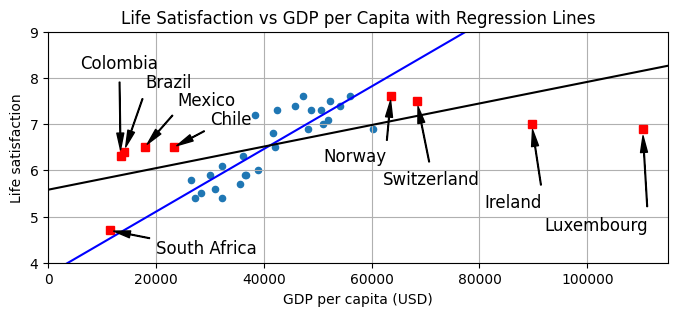

In [33]:
PLOT_WIDTH = 8
PLOT_HEIGHT = 3
MIN_LIFE_SAT = 4
MAX_LIFE_SAT = 9


def plot_regression_line(ax, theta_0, theta_1, color, label):
    X_range = np.linspace(0, 115_000, 1000)
    y_range = theta_0 + theta_1 * X_range
    ax.plot(X_range, y_range, color, label=label)


def annotate_countries(ax, country_data, position_text):
    for country, pos_text in position_text.items():
        pos_data_x = country_data.loc[country, gdppc_col]
        pos_data_y = country_data.loc[country, lifesat_col]
        ax.annotate(country, xy=(pos_data_x, pos_data_y),
                    xytext=pos_text, fontsize=12,
                    arrowprops=dict(facecolor='black', width=0.5,
                                    shrink=0.08, headwidth=5))
        ax.plot(pos_data_x, pos_data_y, "rs")


X_full = full_country_stats[[gdppc_col]].values
y_full = full_country_stats[[lifesat_col]].values


lin_reg_full = LinearRegression()
lin_reg_full.fit(X_full, y_full)
theta_0_full = lin_reg_full.intercept_[0]
theta_1_full = lin_reg_full.coef_[0][0]


fig, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))
full_country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, grid=True, ax=ax)


annotate_countries(ax, missing_data, position_text_missing_countries)


plot_regression_line(ax, theta_0, theta_1, "b", "Initial Model")
plot_regression_line(ax, theta_0_full, theta_1_full, "k", "Full Model")


ax.set_xlim([0, 115_000])
ax.set_ylim([MIN_LIFE_SAT, MAX_LIFE_SAT])
ax.set_xlabel("GDP per capita (USD)")
ax.set_ylabel("Life satisfaction")
plt.title("Life Satisfaction vs GDP per Capita with Regression Lines")


plt.savefig('representative_training_data_scatterplot')

plt.show()


Overfitting:


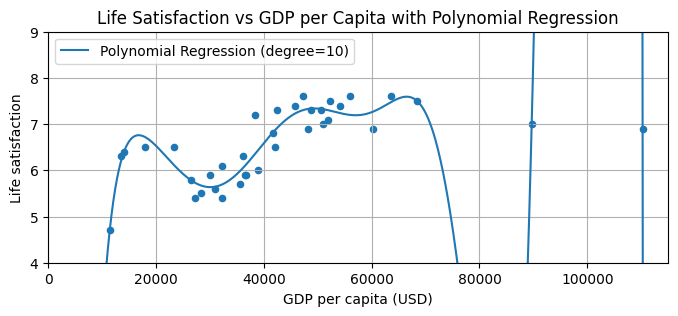

In [35]:
from sklearn import preprocessing, pipeline, linear_model

PLOT_WIDTH = 8
PLOT_HEIGHT = 3
MIN_LIFE_SAT = 4
MAX_LIFE_SAT = 9


def plot_data(df, x_col, y_col, ax):
    df.plot(kind='scatter', x=x_col, y=y_col, grid=True, ax=ax)


def fit_and_plot_poly_regression(ax, X, y, degree=10):
    # Define the pipeline
    poly = preprocessing.PolynomialFeatures(degree=degree, include_bias=False)
    scaler = preprocessing.StandardScaler()
    lin_reg = linear_model.LinearRegression()
    pipeline_reg = pipeline.Pipeline([
        ('poly', poly),
        ('scal', scaler),
        ('lin', lin_reg)
    ])


    pipeline_reg.fit(X, y)


    X_range = np.linspace(0, 115_000, 1000).reshape(-1, 1)
    curve = pipeline_reg.predict(X_range)


    ax.plot(X_range, curve, label=f'Polynomial Regression (degree={degree})')


X_full = full_country_stats[[gdppc_col]].values
y_full = full_country_stats[[lifesat_col]].values


fig, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))


plot_data(full_country_stats, gdppc_col, lifesat_col, ax)


fit_and_plot_poly_regression(ax, X_full, y_full, degree=10)

ax.set_xlim([0, 115_000])
ax.set_ylim([MIN_LIFE_SAT, MAX_LIFE_SAT])
ax.set_xlabel("GDP per capita (USD)")
ax.set_ylabel("Life satisfaction")
plt.title("Life Satisfaction vs GDP per Capita with Polynomial Regression")


plt.savefig('overfitting_model_plot')


plt.legend()
plt.show()

In [36]:
w_countries = [c for c in full_country_stats.index if "W" in c.upper()]
full_country_stats.loc[w_countries][lifesat_col]

Country
New Zealand    7.3
Sweden         7.3
Norway         7.6
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [37]:
all_w_countries = [c for c in gdp_per_capita.index if "W" in c.upper()]
gdp_per_capita.loc[all_w_countries].sort_values(by=gdppc_col)

,GDP per capita (USD)
Country,
Malawi,1486.778248
Rwanda,2098.710362
Zimbabwe,2744.690758
Africa Western and Central,4003.158913
Papua New Guinea,4101.218882
Lower middle income,6722.809932
Eswatini,8392.717564
Low & middle income,10293.855325
Arab World,13753.707307


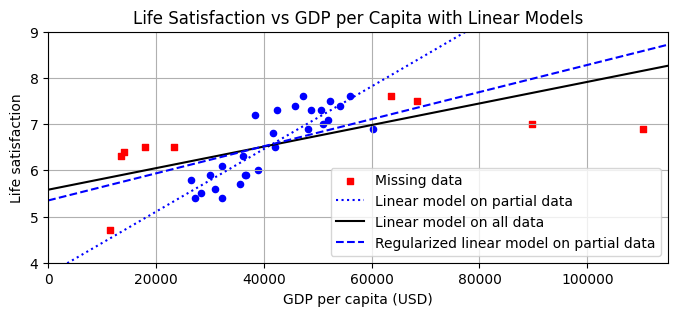

In [42]:
from sklearn import linear_model


PLOT_WIDTH = 8
PLOT_HEIGHT = 3
MIN_LIFE_SAT = 4
MAX_LIFE_SAT = 9
GDP_RANGE = np.linspace(0, 115_000, 1000)


def plot_scatter_data(ax, df, x_col, y_col, marker='o', color='b', label=None):
    df.plot(kind='scatter', x=x_col, y=y_col, marker=marker, color=color, grid=True, ax=ax, label=label)


def plot_regression_line(ax, X, intercept, coef, style, label):
    y_pred = intercept + coef * X
    ax.plot(X, y_pred, style, label=label)


X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values


lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_sample, y_sample)
t0, t1 = lin_reg.intercept_[0], lin_reg.coef_[0][0]


X_full = full_country_stats[[gdppc_col]].values
y_full = full_country_stats[[lifesat_col]].values
lin_reg_full = linear_model.LinearRegression()
lin_reg_full.fit(X_full, y_full)
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]


ridge = linear_model.Ridge(alpha=10**9.5)
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]


fig, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HEIGHT))


plot_scatter_data(ax, country_stats, gdppc_col, lifesat_col)
plot_scatter_data(ax, missing_data, gdppc_col, lifesat_col, marker='s', color='r', label='Missing data')


plot_regression_line(ax, GDP_RANGE, t0, t1, "b:", "Linear model on partial data")
plot_regression_line(ax, GDP_RANGE, t0full, t1full, "k-", "Linear model on all data")
plot_regression_line(ax, GDP_RANGE, t0ridge, t1ridge, "b--", "Regularized linear model on partial data")


ax.set_xlim([0, 115_000])
ax.set_ylim([MIN_LIFE_SAT, MAX_LIFE_SAT])
ax.set_xlabel("GDP per capita (USD)")
ax.set_ylabel("Life satisfaction")
ax.set_title("Life Satisfaction vs GDP per Capita with Linear Models")


ax.legend(loc="lower right")


plt.savefig('ridge_model_plot')
plt.show()
